In [6]:
import numpy as np
from datetime import datetime
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from datetime import datetime
plt.rcParams['figure.figsize'] = [15, 7.5]
plt.rcParams.update({'font.size': 16,'legend.fontsize':16})
import seaborn as sns
import sys
import os
from config import config
import fur.path_assistant as path_assistant
from fur.waveform_reader import read_waveform
from fur.finding_period import get_period
from fur.fluctuations import get_fluctiation_and_noise_var
shift_03_09_2020 = path_assistant.PathAssistant('shift_03_09_2020',      
    ignore_files=["RefCurve_2020-03-10_0_111937_test.Wfm.bin"])
waveforms_dir = shift_03_09_2020.get_waveforms_dir()
results_dir = shift_03_09_2020.get_results_dir()
bpm_files_df = shift_03_09_2020.get_bpm_files_df()
acnet_data_df = shift_03_09_2020.get_acnet_data_df("all_acnet_data_for_directly_connected_case_03_09_2020.csv")
t1 = datetime(2020, 3, 9, 19, 8, 0)
t2 = datetime(2020, 3, 9, 19, 42, 0)

In [7]:
fluctuation_waveforms_df = shift_03_09_2020.get_fluctuation_waveforms_df()
bpm_files_df = shift_03_09_2020.get_bpm_files_df()

In [8]:
bpm_files_df = bpm_files_df[(bpm_files_df["file_datetime"] > t1) \
& (bpm_files_df["file_datetime"]<t2)].reset_index()

In [9]:
fluctuation_waveforms_df = fluctuation_waveforms_df[(fluctuation_waveforms_df["file_datetime"] > t1) \
& (fluctuation_waveforms_df["file_datetime"]<t2)].reset_index()

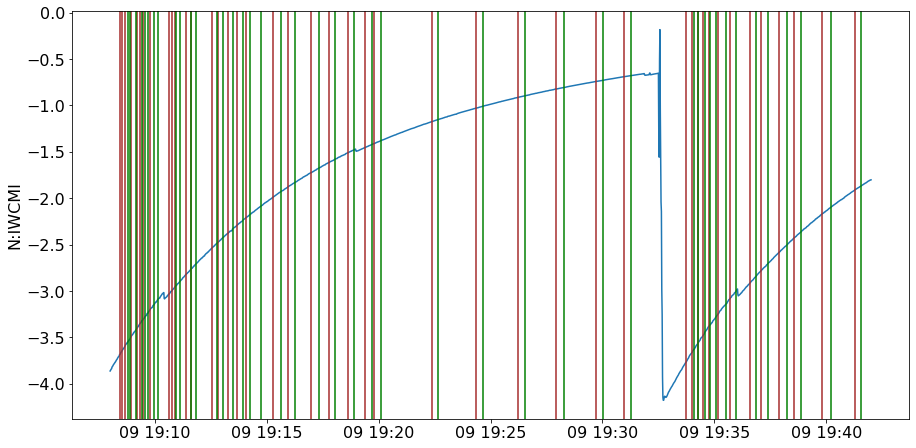

In [10]:
ax = sns.lineplot(x=acnet_data_df.index, y=acnet_data_df["N:IWCMI"])
for t in fluctuation_waveforms_df["file_datetime"]:
    plt.axvline(t, color="brown")
for t in bpm_files_df["file_datetime"]:
    plt.axvline(t, color="green")
plt.show()

In [11]:
fluctuation_waveforms_df["rounded_bpm_file_datetime"] = \
    bpm_files_df["file_datetime"].apply(lambda t: t.round(freq='S'))

In [12]:
iwcm_to_wbeam = config["IWCMI_to_IBEAMA"]

In [13]:
fluctuation_waveforms_df["N:IWCMI"] = fluctuation_waveforms_df["rounded_bpm_file_datetime"] \
    .apply(lambda t: acnet_data_df.loc[t, "N:IWCMI"])

In [14]:
res_df = shift_03_09_2020.get_fluctuations_df("res_df_directly_connected_FLAT_03_09_2020.csv")

In [15]:
current = -iwcm_to_wbeam*fluctuation_waveforms_df["N:IWCMI"].values
amplitude = res_df["ch2_amplitude"].values

In [16]:
reg = linear_model.LinearRegression(fit_intercept=False)
x = current
y = amplitude
reg.fit(x.reshape((len(x), 1)), y)
a = reg.coef_[0]
a

0.33991512389558326

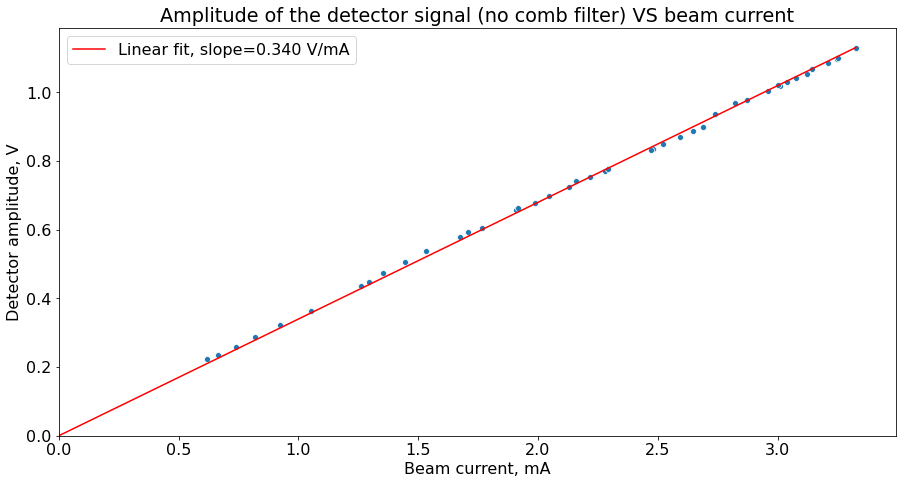

In [17]:
ax = sns.scatterplot(current, amplitude)
ax2 = sns.lineplot(x=[0, max(current)],y=[0, a*max(current)], color='red',
    label="Linear fit, slope={:.3f} V/mA".format(a))
ax.set_xlabel("Beam current, mA")
ax.set_ylabel("Detector amplitude, V")
ax.set_ylim(0, ax.get_ylim()[1])
ax.set_xlim(0, ax.get_xlim()[1])
ax.set_title("Amplitude of the detector signal (no comb filter) VS beam current")
plt.show()

Assuming all light that reaches the lens, is then collected by the detector's sensitive area:

In [18]:
photons_per_electron = 0.01221971387651638

In [19]:
slope_theory = 1/(config["Cf"])*photons_per_electron*config["IOTA_revolution_period"]/1000
slope_theory

0.8126109727883394

In [21]:
fluctuation_waveforms_df["bpm_file_path"] = bpm_files_df["file_path"]

In [22]:
fluctuation_waveforms_df.head()

,index,file_name,file_path,file_datetime,rounded_bpm_file_datetime,N:IWCMI,bpm_file_path
0,23,RefCurve_2020-03-09_11_190827.Wfm.bin,/mnt/c/Users/lobac_000/OneDrive - Fermi Nation...,2020-03-09 19:08:27,2020-03-09 19:08:47,-3.547789,/mnt/c/Users/lobac_000/OneDrive - Fermi Nation...
1,30,RefCurve_2020-03-09_12_190831.Wfm.bin,/mnt/c/Users/lobac_000/OneDrive - Fermi Nation...,2020-03-09 19:08:31,2020-03-09 19:08:54,-3.507342,/mnt/c/Users/lobac_000/OneDrive - Fermi Nation...
2,31,RefCurve_2020-03-09_13_190839.Wfm.bin,/mnt/c/Users/lobac_000/OneDrive - Fermi Nation...,2020-03-09 19:08:39,2020-03-09 19:09:10,-3.413848,/mnt/c/Users/lobac_000/OneDrive - Fermi Nation...
3,32,RefCurve_2020-03-09_14_190857.Wfm.bin,/mnt/c/Users/lobac_000/OneDrive - Fermi Nation...,2020-03-09 19:08:57,2020-03-09 19:09:25,-3.319769,/mnt/c/Users/lobac_000/OneDrive - Fermi Nation...
4,33,RefCurve_2020-03-09_15_190911.Wfm.bin,/mnt/c/Users/lobac_000/OneDrive - Fermi Nation...,2020-03-09 19:09:11,2020-03-09 19:09:32,-3.288017,/mnt/c/Users/lobac_000/OneDrive - Fermi Nation...
